# Data Analysis:
### This notebook aims to make an initial description of the data available for training in TrainingData_BU&Public_CWS.csv

This notebook:
- Replaces NaN values in 'verifier_user_id' field with -1
- Deletes the last row of the database since it doesn't contain any values. 
- Imports all the values in the database as the correct type (either string, float or int). 



TODO:
- export a cleaned version of the dataframe. 
- Investigate distribution of data. 
- Find out whether the clips are from different sections of a longer recordings.
- Find out whether there are duplicates within the database. This is very important for making sure that the validation set and the withheld test set do not contain examples which were also in the training set. This is a form of data leakage which would make the model seem to be performing better during evaluation than it would in reality. 


### Notes
There is a field 'ARU Task Status' with value of 'bad weather' and 'malfunction'. Option to filter out bad weather days. 






In [1]:
import pandas as pd
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
data_path = Path('../../data/raw/')

 # Load the database
 Reorder columns so that the clip_id is at the start. This way when the database is filtered, exported and re-loaded later we'll still have access to the original indices. 


In [3]:
meta = pd.read_csv(data_path/'TrainingData_BU&Public_CWS.csv')

meta['clip_id'] = meta.index

cols = list(meta.columns)
meta = meta[cols[-1:] + cols[:-1]]


/var/folders/hy/36n7jr6x3h74ddx507dc12_00000gn/T/ipykernel_16180/3376304062.py:1: DtypeWarning: Columns (22) have mixed types. Specify dtype option on import or set low_memory=False.
  meta = pd.read_csv(data_path/'TrainingData_BU&Public_CWS.csv')


In [4]:
def display_all(df):
    with pd.option_context('display.max_columns', 70):
        with pd.option_context("display.max_rows", 1000):
            display(df)


# FIx NAs
1. Find out how many values in each field are blank

In [5]:
display_all(meta.tail())

,clip_id,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,species_code,species_common_name,species_scientific_name,species_class,detection_time,task_duration,tag_duration,min_tag_freq,max_tag_freq,tag_id,individual_order,vocalization,abundance,tag_rating,tag_is_verified,clip_channel_used,observer,observer_user_id,verifier_user_id,left_full_freq_tag_rms_peak_dbfs,left_full_freq_tag_rms_trough_dbfs,left_full_freq_tag_pk_count,left_full_freq_tag_dc_offset,left_full_freq_tag_min_level,left_full_freq_tag_max_level,left_full_freq_tag_peak_level_dbfs,left_freq_filter_tag_rms_peak_dbfs,left_freq_filter_tag_rms_trough_dbfs,left_freq_filter_tag_pk_count,left_freq_filter_tag_dc_offset,left_freq_filter_tag_min_level,left_freq_filter_tag_max_level,left_freq_filter_tag_peak_level_dbfs,right_full_freq_tag_rms_peak_dbfs,right_full_freq_tag_rms_trough_dbfs,right_full_freq_tag_pk_count,right_full_freq_tag_dc_offset,right_full_freq_tag_min_level,right_full_freq_tag_max_level,right_full_freq_tag_peak_level_dbfs,right_freq_filter_tag_rms_peak_dbfs,right_freq_filter_tag_rms_trough_dbfs,right_freq_filter_tag_pk_count,right_freq_filter_tag_dc_offset,right_freq_filter_tag_min_level,right_freq_filter_tag_max_level,right_freq_filter_tag_peak_level_dbfs,tagged_in_wildtrax,url,tag_spectrogram_url,clip_url,sensorId,tasks,status
1152835,1152835,BU,Zeller Woodpeckers- Time of Day,1241,Y-58-421-C,43958.0,2018-06-07 03:44:00,480766.0,None,442524.0,Transcribed,UNWO,Unidentified Woodpecker,NaN,Aves,42.90,60.0,0.93,0.15kHz,1.11kHz,2801910.0,1.0,Non-vocal,1,NaN,f,1.0,Austin Zeller,841.0,NaN,-42.91,-49.45,2.0,-0.000029,-0.021179,0.028168,-31.00,-48.50,-60.37,3.0,0.000010,-0.014435,0.010468,-36.81,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active
1152836,1152836,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303.0,2018-06-17 05:05:00,480207.0,None,441965.0,Transcribed,PIWO,Pileated Woodpecker,DRYOCOPUS PILEATUS,Aves,43.68,60.0,3.28,0.74kHz,2.85kHz,2796592.0,1.0,Call,1,NaN,f,1.0,Austin Zeller,841.0,NaN,-27.54,-35.22,3.0,0.033290,-0.008209,0.059052,-24.58,-59.69,-73.58,3.0,-0.000001,-0.017334,0.004333,-35.22,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active
1152837,1152837,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303.0,2018-06-17 06:05:00,480596.0,None,442354.0,Transcribed,PIWO,Pileated Woodpecker,DRYOCOPUS PILEATUS,Aves,16.30,60.0,2.34,0.18kHz,1.33kHz,2798296.0,1.0,Non-vocal,1,NaN,f,1.0,Austin Zeller,841.0,NaN,-24.51,-34.52,2.0,0.033245,-0.031403,0.101440,-19.88,-36.64,-46.33,5.0,-0.008149,-0.026703,0.008820,-31.47,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active
1152838,1152838,BU,Zeller Woodpeckers- Time of Day,1241,Y-7-253-SW,303.0,2018-06-17 06:05:00,480596.0,None,442354.0,Transcribed,PIWO,Pileated Woodpecker,DRYOCOPUS PILEATUS,Aves,39.75,60.0,2.53,0.23kHz,1.33kHz,2798297.0,1.0,Song,1,NaN,f,1.0,Austin Zeller,841.0,NaN,-14.87,-35.70,2.0,0.033391,-0.174133,0.301270,-10.42,-32.44,-52.10,5.0,-0.004382,-0.042969,0.024841,-27.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,3583,Active
1152839,1152839,NaN,Community tagging: EMCLA Pilot Program 2012,84,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

The last entry in this .csv file contains NaNs for most of the fields. Delete this. 

In [6]:
meta.drop(meta.tail(1).index, inplace=True)

In [7]:
features = meta.columns
idx = 28
print(features[idx])
display_all(meta[features[idx]].value_counts(dropna=False))

observer_user_id


 18.0      147312
 15.0       70582
 41.0       68339
 22.0       60454
 1372.0     48288
 11.0       46565
 37.0       45935
 23.0       39339
 1349.0     31370
 1348.0     30879
 532.0      29471
 533.0      27144
 531.0      26341
 1343.0     24887
 527.0      24083
 26.0       22478
 20.0       20330
 55.0       20326
 1952.0     20090
 25.0       18431
 42.0       18019
 39.0       17679
 1057.0     16614
 1353.0     14988
 660.0      14182
 1357.0     13992
 17.0       11854
 1356.0     11448
 1208.0     10975
 31.0       10824
 1346.0     10083
 1881.0      9827
 67.0        9627
 2546.0      9503
 48.0        9287
 5.0         8476
 27.0        7712
 2047.0      7661
 1955.0      7555
 1128.0      6936
 1224.0      6527
 70.0        6011
 64.0        4886
 69.0        4815
 525.0       4571
 19.0        4515
 534.0       4441
 1269.0      4391
 1388.0      4284
 1234.0      3999
 1841.0      3826
 1275.0      3537
 1242.0      3262
 1257.0      3066
 71.0        3062
 1247.0   

Some of the ID columns contain a high number of 'NaN's. We can replace these with the value -1 

In [8]:
meta.dtypes

clip_id                 int64
organization           object
project                object
project_id              int64
location               object
                        ...  
tag_spectrogram_url    object
clip_url               object
sensorId               object
tasks                   int64
status                 object
Length: 65, dtype: object

Some of the data types have multiple types within one field. This is causing duplicate values when viewing data (e.g. the abundance field contains numeric values for 1 and a string values for 1). Different data types are are counted separately when using pandas.describe(). To fix this issue, specify the data type by passing in a type dictionary when reading the csv file. 

### Choose types for the different fields
If mixed types are required, change the value back to 'object'

In [9]:
type_dict = {
    "organization": str,
    "project": object,
    "project_id": int,
    "location": str,
    "location_id": int,
    "recording_date_time": object,
    "recording_id": int,
    "task_method": str,
    "task_id": int,
    "aru_task_status": str,
    "species_code": str,
    "species_common_name": str,
    "species_scientific_name": str,
    "species_class": str,
    "detection_time": float,
    "task_duration": float,
    "tag_duration": float,
    "min_tag_freq": object,
    "max_tag_freq": object,
    "tag_id": int,
    "individual_order": str,
    "vocalization": str,
    "abundance": str,
    "tag_rating": float,
    "tag_is_verified": object,
    "clip_channel_used": float,
    "observer": object,
    "observer_user_id": int,
    "verifier_user_id": int,
    "left_full_freq_tag_rms_peak_dbfs": float,
    "left_full_freq_tag_rms_trough_dbfs": float,
    "left_full_freq_tag_pk_count": float,
    "left_full_freq_tag_dc_offset": float,
    "left_full_freq_tag_min_level": float,
    "left_full_freq_tag_max_level": float,
    "left_full_freq_tag_peak_level_dbfs": float,
    "left_freq_filter_tag_rms_peak_dbfs": float,
    "left_freq_filter_tag_rms_trough_dbfs": float,
    "left_freq_filter_tag_pk_count": float,
    "left_freq_filter_tag_dc_offset": float,
    "left_freq_filter_tag_min_level": float,
    "left_freq_filter_tag_max_level": float,
    "left_freq_filter_tag_peak_level_dbfs": float,
    "right_full_freq_tag_rms_peak_dbfs": float,
    "right_full_freq_tag_rms_trough_dbfs": float,
    "right_full_freq_tag_pk_count": float,
    "right_full_freq_tag_dc_offset": float,
    "right_full_freq_tag_min_level": float,
    "right_full_freq_tag_max_level": float,
    "right_full_freq_tag_peak_level_dbfs": float,
    "right_freq_filter_tag_rms_peak_dbfs": float,
    "right_freq_filter_tag_rms_trough_dbfs": float,
    "right_freq_filter_tag_pk_count": float,
    "right_freq_filter_tag_dc_offset": float,
    "right_freq_filter_tag_min_level": float,
    "right_freq_filter_tag_max_level": float,
    "right_freq_filter_tag_peak_level_dbfs": float,
    "tagged_in_wildtrax": str,
    "url": str,
    "tag_spectrogram_url": str,
    "clip_url": str,
    "sensorId": str,
    "tasks": int,
    "status": str,
}

The column at index 29 is verifier user id. It contains a lot of NaN values. These are replaced with -1.

In [12]:
column_with_nas = meta.columns[29]
column_with_nas

'verifier_user_id'

In [14]:
meta.verifier_user_id[0], sum(meta.verifier_user_id.isna())

(nan, 1124096)

In [15]:
meta.loc[meta['verifier_user_id'].isna(), 'verifier_user_id'] = -1

In [16]:
meta.verifier_user_id[0], sum(meta.verifier_user_id.isna())

(-1.0, 0)

## Change all the data types in the dataframe to the chosen types contained in the type dict.

In [17]:
meta = meta.astype(type_dict)

# Look at the reording ids

In [18]:
recording_ids = meta.recording_id.value_counts()
meta.recording_id.value_counts().head()

104940    394
104939    370
104942    314
104941    290
72961     286
Name: recording_id, dtype: int64

In [19]:
top_recordings = meta.recording_id.value_counts()

## List of the recording IDs which generate the most clips. 
The recording ids aren't unique, indicating that there are mulitple references to the same recording within the database.


In [20]:
top_recordings

104940    394
104939    370
104942    314
104941    290
72961     286
         ... 
375564      1
91632       1
375561      1
370337      1
203663      1
Name: recording_id, Length: 97438, dtype: int64

Text(0.5, 1.0, 'Number of clips per recording in the database')

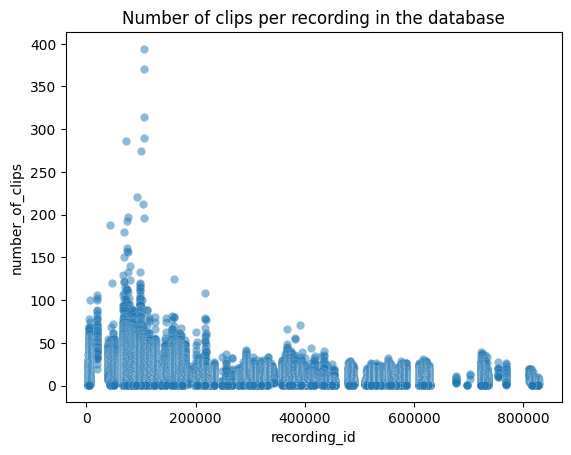

In [21]:
ax = sns.scatterplot(x=top_recordings.index, y=top_recordings.values)
plt.setp(ax.collections, alpha=.5, linewidth=.1)
plt.xlabel('recording_id')
plt.ylabel('number_of_clips')
plt.title('Number of clips per recording in the database')

List of the different projects which contribute to the recordings in the database. 

In [22]:
projects = meta.project.unique().tolist()
projects

['Alberta Archetypes',
 'Amplitude Quality Testing 2020',
 'ARU Test Project Model Comparisons 2021',
 'BATS & LATS',
 'Bayne-BTNW-BU-AnyYr 2021',
 'Bayne-EPIC-ANYspp-AnyYr 2021',
 'Bayne-OSFL-BU-AnyYr 2021',
 'Bayne-OSM-YERA-2021',
 'Bayne-OVEN-BU-AnyYr 2021',
 'Bayne-TEWA no OVEN-BU-AnyYr 2022',
 'Big Grid Pilot Program 2014',
 'Big Grids',
 'Bioacoustic Unit Digital Point Counts',
 'Boreal Avian Modelling Project Re-visits 2019',
 'Boreal Wetland Community Monitoring',
 'BU-LF WIDTH - EDGE COMMUNITIES 2021-2022',
 'Burke-GGOW 2021',
 'BU Triangulation - Find Non-Contaminated Sounds',
 'BU-Well pad Bird Communities 2021-2022',
 'CWS-Ontario Akimiski Island 2022',
 'CWS-Ontario Atlas Digital Point Counts Boreal FMUs 2022',
 'CWS-Ontario Atlas Northern River Trips 2022',
 'CWS-Ontario Birds of James Bay Lowlands 2021',
 'CWS-Ontario Birds of James Bay Lowlands 2021 (Resample)',
 'CWS-Ontario Boreal FMUs - ARUs 2018',
 'CWS-Ontario Boreal FMUs - ARUs 2019',
 'CWS-Ontario Boreal FMUs - A

# Filter out old recordings. 
There are 114 projects in the database. Some of the older (pre-2016 - 2017) recording units had a high signal to noise ratio due to the recording devices used. Filtering out projects older than this could improve average quality of recordings. 
<br><br>
Also more recent data might better represent current call patterns in the field. 


In [23]:
years = range(2017, 2024)

In [24]:
recent_projects = []
for year in years:
    year_projects = [project for project in projects if f'{year}' in project]
    recent_projects.extend(year_projects)

## Projects filtered by most recent years

In [25]:
recent_projects

['Ducks Pilot 2017',
 'General-Community-WindFarms-2017',
 'Grizzly Bear Songbird Surrogacy Project 2017',
 'Jasper National Park 2017',
 'Single Visits 2017',
 'YT Boreal Monitoring Program CWS Northern Region 2017 & 2018',
 'CWS-Ontario Boreal FMUs - ARUs 2018',
 'General-Community-WoodBuffaloNationalPark-2018',
 'Grasslands National Park Ecological Integrity Songbird Monitoring Program 2018',
 'Post-disturbance Temporal Gradient 2018',
 'River Refugia 2018',
 'YT Boreal Monitoring Program CWS Northern Region 2017 & 2018',
 'Boreal Avian Modelling Project Re-visits 2019',
 'CWS-Ontario Boreal FMUs - ARUs 2019',
 'CWS-Ontario PEP NWA - ARUs 2019',
 'Grasslands National Park Ecological Integrity Songbird Monitoring Program 2019',
 'Light Pollution 2019',
 'Opportunistic Wetlands Pilot 2019',
 'Stubbing Pilot 2019',
 'Wellpad Reclamation 2019',
 'YT Boreal Monitoring Program CWS Northern Region 2019',
 'YT High Elevation Monitoring Program CWS Northern Region 2019',
 'Amplitude Quality 

In [26]:
len(meta.recording_id.unique())

97438

There are 97439 unique recordings in the database.


### Remove the clips which don't contain a link to a recording. 
These won't be useful since we can't download the audio for these clips. 

In [27]:
meta.drop(meta.loc[meta.clip_url=='nan'].index, inplace=True)
meta.clip_url.value_counts()

https://wildtrax-aru.s3.us-west-2.amazonaws.com/4bdbfd63-cfc1-411f-9922-daaf985dff39/d11f7d2992044854a039993f1e02c0a3.mp3          1
https://wildtrax-aru-ca.s3.ca-central-1.amazonaws.com/38e086b4-b908-465d-92ae-46cf601b1dd4/6a1f67c453624208ad37150fdf8fa1b8.mp3    1
https://wildtrax-aru-ca.s3.ca-central-1.amazonaws.com/523e6895-834c-4e33-90ab-45410e4bdaa9/559fb5a8220647efab43766019a1430e.mp3    1
https://wildtrax-aru-ca.s3.ca-central-1.amazonaws.com/38e086b4-b908-465d-92ae-46cf601b1dd4/bfba1180cbf548649cc98c8e03c358e1.mp3    1
https://wildtrax-aru-ca.s3.ca-central-1.amazonaws.com/38e086b4-b908-465d-92ae-46cf601b1dd4/610289383568452898ae21a82e4264a5.mp3    1
                                                                                                                                  ..
https://wildtrax-aru.s3.us-west-2.amazonaws.com/5ef42a32-a5e3-4851-9cdb-5ebb894640fa/fe8a5def14a340e4a500704ffbc7c1c4.mp3          1
https://wildtrax-aru.s3.us-west-2.amazonaws.com/5ef42a32-a5e3-4851-9c

In [28]:
meta.loc[meta.species_code=='OSFL'].url.iloc[1]

'https://portal.wildtrax.ca/home/aru-tasks/recording.html?taskId=343288'

# Look at the distribution of clip lengths in  TrainingData_BU&Public_CWS.csv

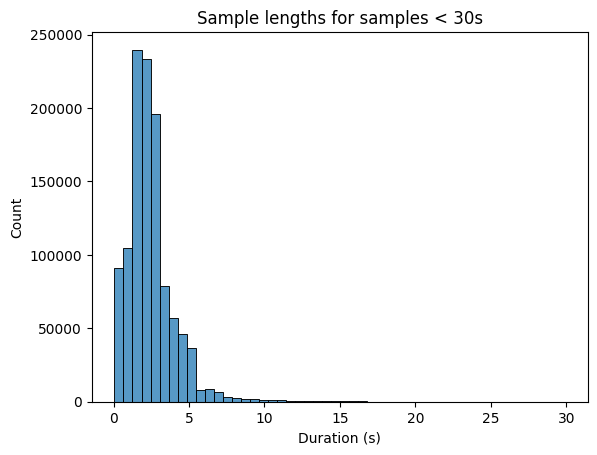

In [29]:
df = meta.loc[meta.tag_duration<30]
fig, ax = plt.subplots()
sns.histplot(data=df, x='tag_duration', ax=ax, bins=50)
ax.set_xlabel('Duration (s)')
ax.set_ylabel('Count')
ax.set_title('Sample lengths for samples < 30s')
plt.show()

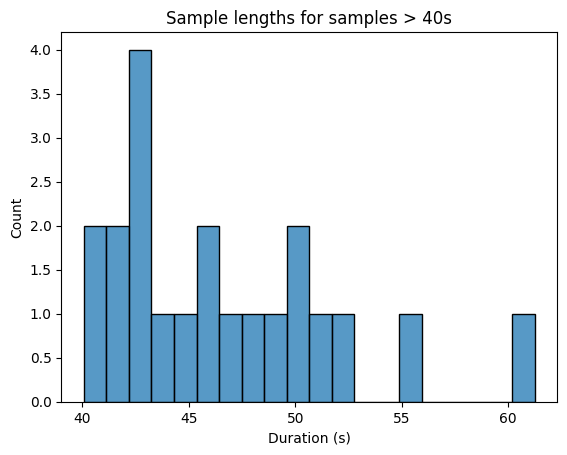

In [30]:
ax = sns.histplot(data=meta.loc[meta.tag_duration > 40], x='tag_duration', bins=20)
ax.set_xlabel('Duration (s)')
ax.set_ylabel('Count')
ax.set_title('Sample lengths for samples > 40s')
plt.show()

# Look at the data for OSFL recordings. 

In [31]:
osfl_df = meta.loc[meta.species_code=='OSFL']
display_all(osfl_df.head())

,clip_id,organization,project,project_id,location,location_id,recording_date_time,recording_id,task_method,task_id,aru_task_status,species_code,species_common_name,species_scientific_name,species_class,detection_time,task_duration,tag_duration,min_tag_freq,max_tag_freq,tag_id,individual_order,vocalization,abundance,tag_rating,tag_is_verified,clip_channel_used,observer,observer_user_id,verifier_user_id,left_full_freq_tag_rms_peak_dbfs,left_full_freq_tag_rms_trough_dbfs,left_full_freq_tag_pk_count,left_full_freq_tag_dc_offset,left_full_freq_tag_min_level,left_full_freq_tag_max_level,left_full_freq_tag_peak_level_dbfs,left_freq_filter_tag_rms_peak_dbfs,left_freq_filter_tag_rms_trough_dbfs,left_freq_filter_tag_pk_count,left_freq_filter_tag_dc_offset,left_freq_filter_tag_min_level,left_freq_filter_tag_max_level,left_freq_filter_tag_peak_level_dbfs,right_full_freq_tag_rms_peak_dbfs,right_full_freq_tag_rms_trough_dbfs,right_full_freq_tag_pk_count,right_full_freq_tag_dc_offset,right_full_freq_tag_min_level,right_full_freq_tag_max_level,right_full_freq_tag_peak_level_dbfs,right_freq_filter_tag_rms_peak_dbfs,right_freq_filter_tag_rms_trough_dbfs,right_freq_filter_tag_pk_count,right_freq_filter_tag_dc_offset,right_freq_filter_tag_min_level,right_freq_filter_tag_max_level,right_freq_filter_tag_peak_level_dbfs,tagged_in_wildtrax,url,tag_spectrogram_url,clip_url,sensorId,tasks,status
3614,3614,BU,ARU Test Project Model Comparisons 2021,1099,ATP-FLB-14A,238593,2021-06-28 05:00:00,366613,1SPM,343280,Transcribed,OSFL,Olive-sided Flycatcher,CONTOPUS COOPERI,Aves,120.10,180.0,0.39,1.49kHz,3.46kHz,2738897,1.0,Call,1,NaN,f,2.0,Christopher Moser-Purdy,37,-1,-36.75,-38.23,3.0,0.013462,0.005829,0.020905,-33.60,-62.51,-68.45,2.0,-0.000002,-0.005005,0.002655,-46.01,-46.80,-49.01,2.0,0.001654,-0.008148,0.009613,-40.34,-62.49,-69.86,2.0,0.0,-0.002441,0.002380,-52.25,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,212,Active
3646,3646,BU,ARU Test Project Model Comparisons 2021,1099,ATP-FLB-14A,238593,2021-06-28 06:00:00,366621,1SPM,343288,Transcribed,OSFL,Olive-sided Flycatcher,CONTOPUS COOPERI,Aves,117.83,180.0,1.54,1.03kHz,5.14kHz,2748897,1.0,Song,1,NaN,f,1.0,Marcus Sommers,1224,-1,-35.81,-38.45,2.0,0.013525,0.002960,0.024292,-32.29,-52.74,-68.22,2.0,-0.000001,-0.005737,0.005890,-44.60,-45.89,-52.40,2.0,0.002683,-0.005341,0.012024,-38.40,-58.97,-70.68,2.0,0.0,-0.003204,0.003113,-49.89,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,212,Active
3696,3696,BU,ARU Test Project Model Comparisons 2021,1099,ATP-FLB-14A,238593,2021-07-02 05:00:00,366633,1SPM,343300,Transcribed,OSFL,Olive-sided Flycatcher,CONTOPUS COOPERI,Aves,0.29,180.0,1.58,1.59kHz,4.90kHz,2744797,1.0,Song,1,NaN,f,2.0,Steve Enid,660,-1,-35.45,-38.60,3.0,0.013311,-0.001526,0.028931,-30.77,-63.31,-67.90,2.0,0.000000,-0.005219,0.002075,-45.65,-44.78,-51.87,2.0,0.002186,-0.009827,0.014099,-37.02,-64.91,-70.18,2.0,0.0,-0.002167,0.002563,-51.82,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,212,Active
3720,3720,BU,ARU Test Project Model Comparisons 2021,1099,ATP-FLB-14A,238593,2021-07-02 06:00:00,366638,1SPM,343305,Transcribed,OSFL,Olive-sided Flycatcher,CONTOPUS COOPERI,Aves,16.96,180.0,0.88,1.73kHz,3.36kHz,2748880,1.0,Call,1,NaN,f,2.0,Kelsey Bell,1242,-1,-33.46,-38.16,3.0,0.013430,-0.020111,0.036530,-28.75,-63.26,-68.08,2.0,-0.000001,-0.003937,0.002563,-48.10,-39.53,-46.97,2.0,0.002085,-0.022461,0.019257,-32.97,-60.93,-69.73,4.0,0.0,-0.002686,0.002747,-51.22,t,https://portal.wildtrax.ca/home/aru-tasks/reco...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,https://wildtrax-aru.s3.us-west-2.amazonaws.co...,ARU,212,Active
3729,3729,BU,ARU Test Project Model Comparisons 2021,1099,

## Here are the projects which generated olive sided flycatcher clips since 2017

In [32]:
osfl_projects = osfl_df.project.unique()
len(osfl_projects)

51

In [33]:
recent_osfl_projects = []
for year in years:
    year_projects = [project for project in osfl_projects if f'{year}' in project]
    recent_osfl_projects.extend(year_projects)

In [34]:
recent_osfl_projects, len(recent_osfl_projects)

(['Grizzly Bear Songbird Surrogacy Project 2017',
  'YT Boreal Monitoring Program CWS Northern Region 2017 & 2018',
  'CWS-Ontario Boreal FMUs - ARUs 2018',
  'River Refugia 2018',
  'YT Boreal Monitoring Program CWS Northern Region 2017 & 2018',
  'CWS-Ontario Boreal FMUs - ARUs 2019',
  'Wellpad Reclamation 2019',
  'YT Boreal Monitoring Program CWS Northern Region 2019',
  'YT High Elevation Monitoring Program CWS Northern Region 2019',
  'General-Community-CallingLakeFragmentationStudy-2020',
  'Light Pollution 2020',
  'Re-Visits 2020',
  'ARU Test Project Model Comparisons 2021',
  'Bayne-OSFL-BU-AnyYr 2021',
  'BU-LF WIDTH - EDGE COMMUNITIES 2021-2022',
  'CWS-Ontario Birds of James Bay Lowlands 2021',
  'CWS-Ontario Birds of James Bay Lowlands 2021 (Resample)',
  'CWS-Ontario Lake Nipigon Ecoregion 2021',
  'CWS-Ontario Lake Superior NMCA 2021',
  'CWS-Ontario Wabakimi 2021',
  'Edge Communities 2021-2022',
  'Lebeuf-Taylor - 2021 RETN',
  'Lebeuf-Taylor - BRCR, RCKI, OSFL, REV

# Look at the reording ids of recordings which have the most OSFL tags. 

In [35]:
osfl_recording_ids = osfl_df.recording_id.value_counts()
osfl_df.recording_id.value_counts().head()

218582    38
255625    37
248827    33
255457    30
255454    27
Name: recording_id, dtype: int64

In [36]:
top_recordings = osfl_df.recording_id.value_counts()

## List IDs which generate the most clips. 
The recording ids aren't unique, indicating that there are mulitple references to the same recording within the database.

In [37]:
top_recordings

218582    38
255625    37
248827    33
255457    30
255454    27
          ..
293110     1
292008     1
293113     1
293114     1
280433     1
Name: recording_id, Length: 4378, dtype: int64

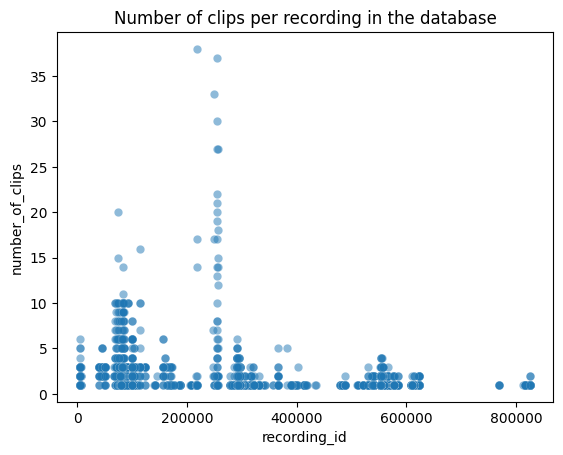

In [38]:
ax = sns.scatterplot(x=top_recordings.index, y=top_recordings.values)
plt.setp(ax.collections, alpha=.5, linewidth=.1)
plt.xlabel('recording_id')
plt.ylabel('number_of_clips')
plt.title('Number of clips per recording in the database')
plt.show()

One of the recordings contains 38 olive sided flycatcher calls. Let's verify this on wildtrax by taking a listen there. 

In [39]:
osfl_df[osfl_df.recording_id==218582].url[896079]

'https://portal.wildtrax.ca/home/aru-tasks/recording.html?taskId=223998'

The index 896079 is the index of one of the clips from recording 218582. Inputted here to reveal the full URL rather than truncated list. 

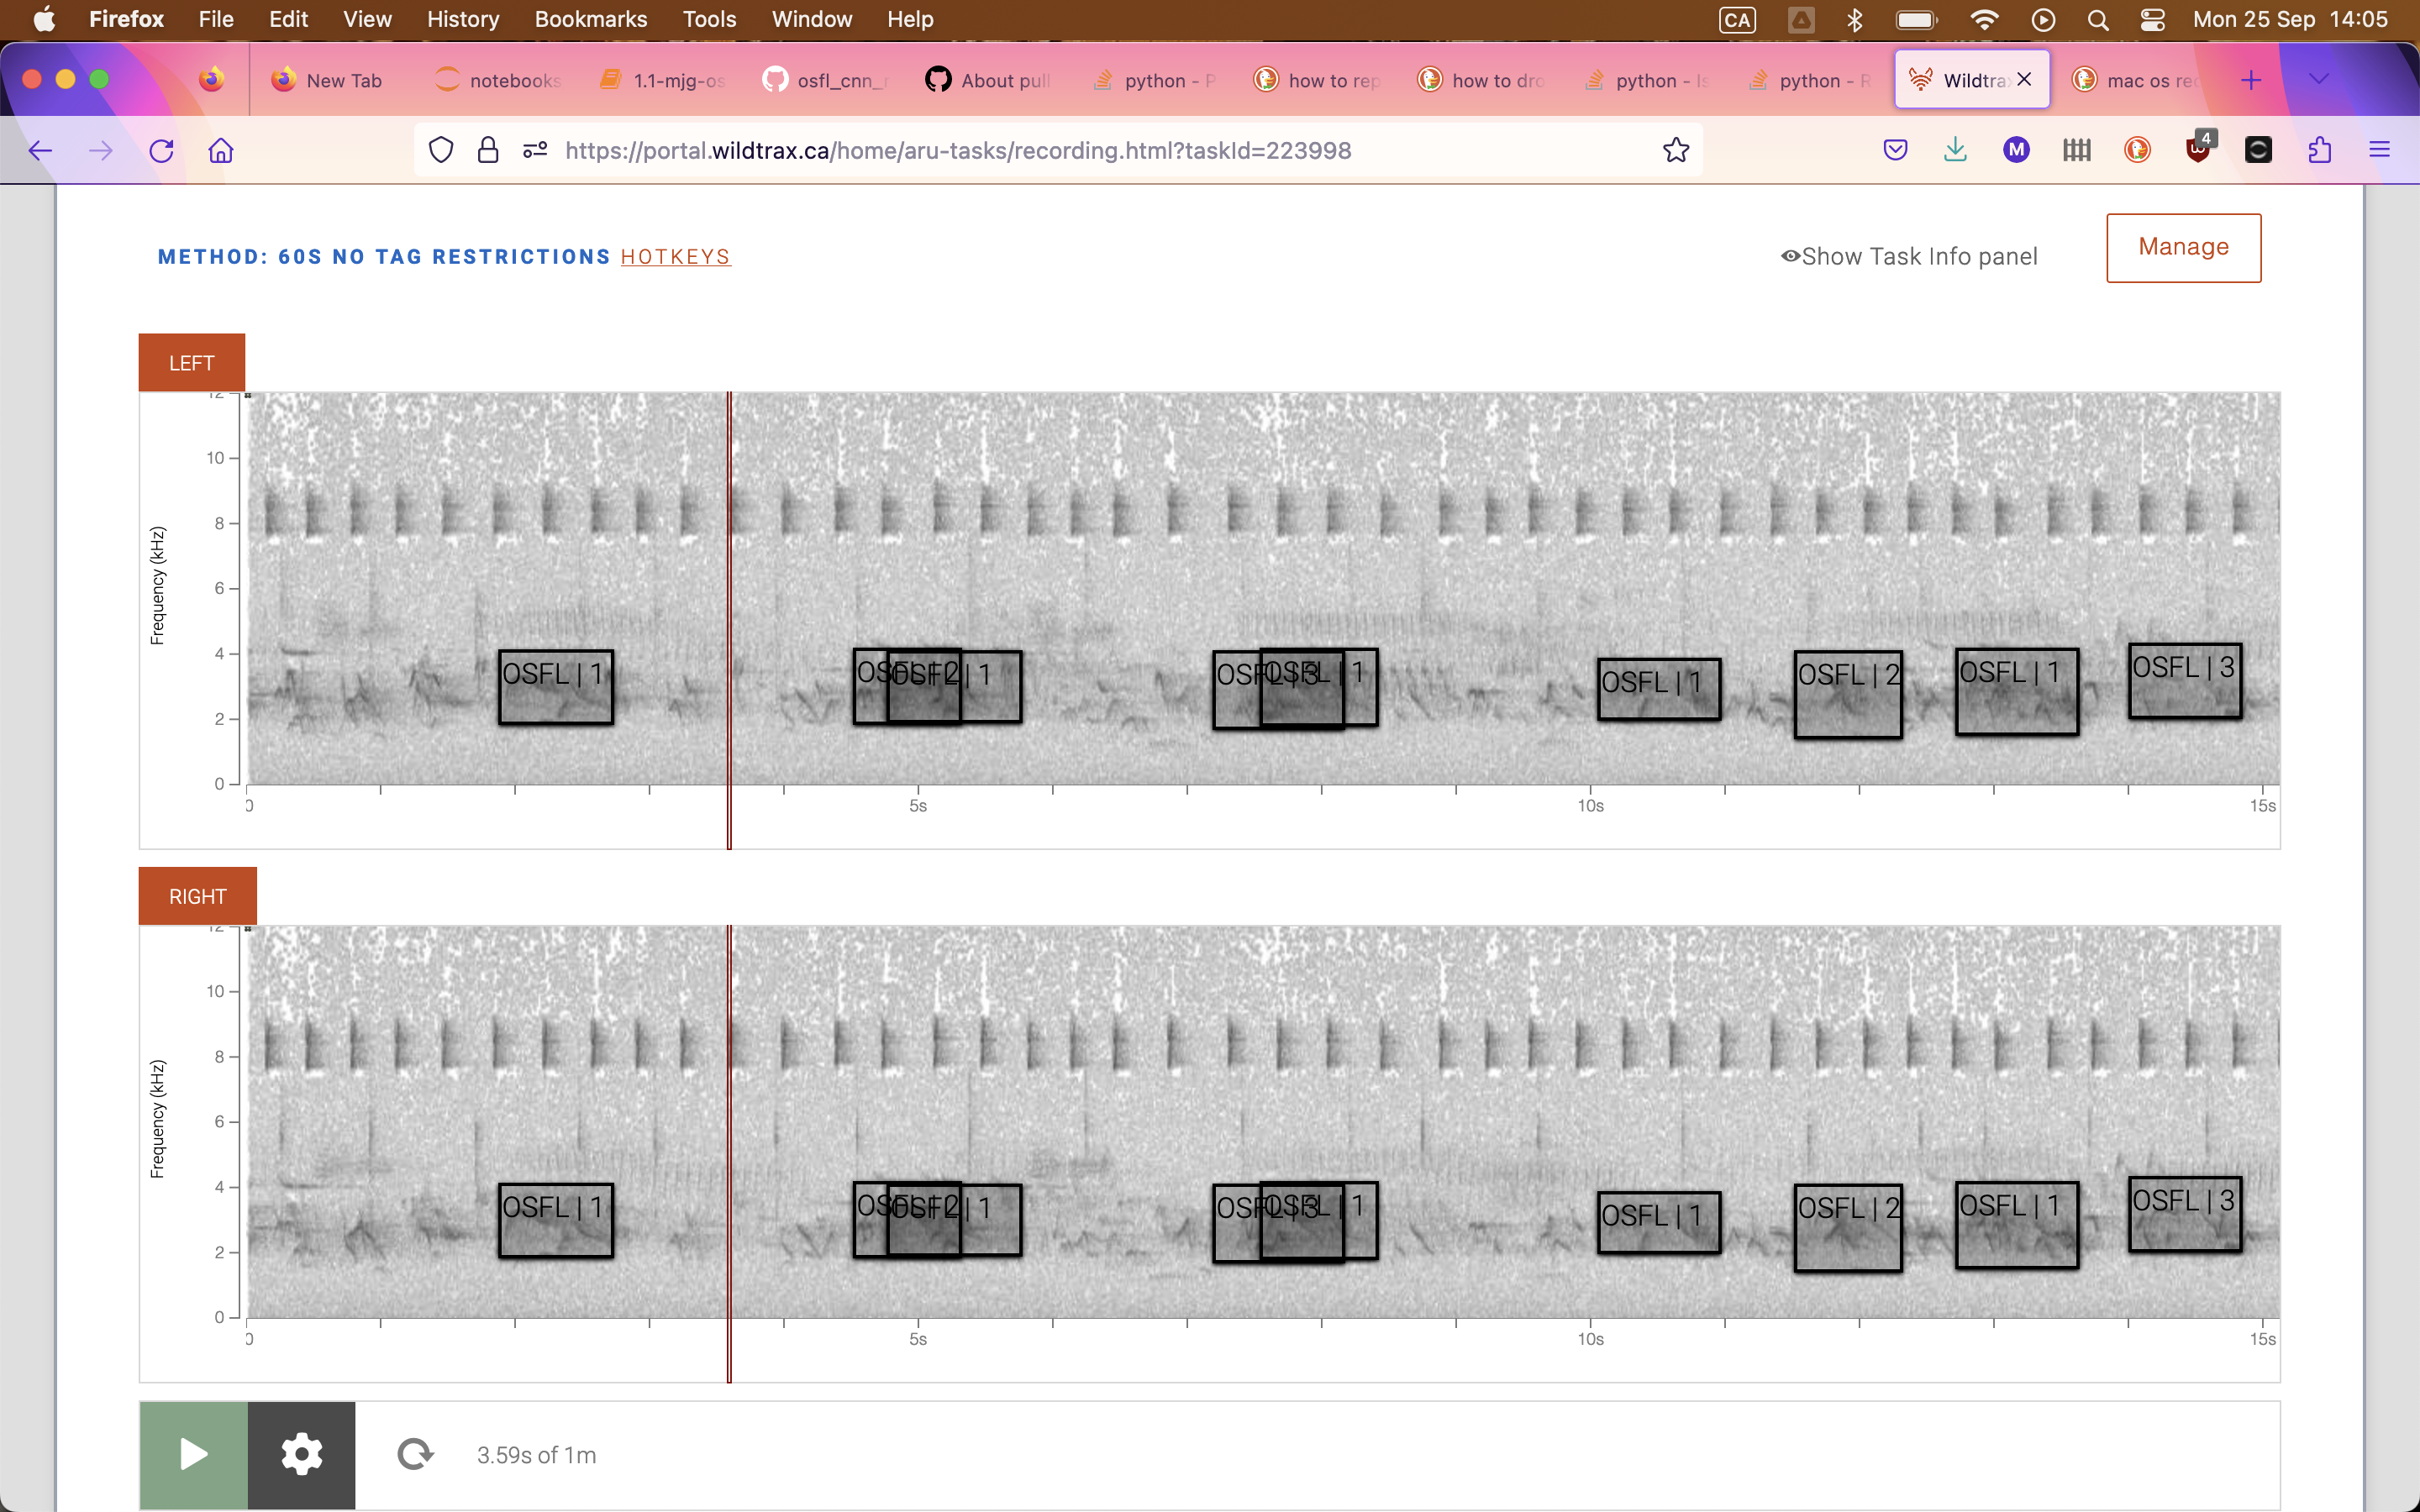

In [40]:
images = Path('../../references/screenshots')
display(Image(images/'img1.png'))

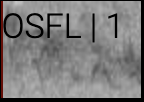

In [41]:
display(Image(images/'clip1.png'))

- This single 60 second recording does indeed contain 38 separate olive sided flycatcher calls. 
- There are a lot of other bird calls in the background. 
- Some of the flycatcher calls can be seen in the spectrogram on WildTrax. 
- Others are so densely populated with calls that it is hard to make out the shape.

# Building the datasets. 
### osfl_call
We need to build two datasets to train a CNN recognizer. The first needs to be made up of recordings containing an olive sided flycatcher call. These will be easy to obtain, since the tagging method used on WildTrax contains a tag for OSFL. We have access to human labelled data from a variety of projects, and URLs links directly to AWS hosted audio files of pre-cut clips. 

### no_osfl_call
The second datased needs to contain clips of the same duration, and from the same recordings as the first This second dataset will be harder to curate, since there is no specific tag for 'not an olive sided flycatcher' in the database. To curate this dataset will require knowledhe and exploration of the tagging methods used for the different wildtrax projects, and some creativity. 

Here are two ideas to build the datasets.
### Option 1 - From 60s no restrictions tag type:
- Obtain full length recordings (not just tags/clips) for recordings which have been tagged using the 60s no restrictions method. Then cut the gaps between OSFL tags and use these as no-call data. 

The disadvantage of using this technique would be that it can't be used for the projects which just tag the first vocalization of a species in a recording, or in a given time period. 

### Option 2 - From the portion of the recording before the first tagged call
- Obtain full length recordings for recordings which have been tagged using the '1SPT' or '1SPM' task method, and treat the audio before the first tag as audio which does not contain an olive sided flycatcher call. 

Advantages - we can build a dataset with call and no-call samples from the same audio recording no matter which task method was used.

Disadvantages - but for the no-call we can only choose from a potentially short portion of recording before the first vocalization. We can not assume that audio after the first olive sided flycatcher ID is absent of any calls of this species. 

### mis-labelled clips
There will inevitably be some missed or mis-labelled tags, and these will need to be identified during model training. Some amount of manual checks might be necessary. 

__Using the model's predictions to clean the dataset__:
Training an initial model early, then looking at where it confidently predicts the incorrect class can be a quick way of cleaning or re-labeling mis-labelled data from the dataset.



In [42]:
# clip 896079 project ID
osfl_df[osfl_df.recording_id==218582].project[896079]

'Lebeuf-Taylor - BRCR, RCKI, OSFL, REVI, TEWA, YRWA - BU 2021'

The screenshot above is taken from a project named _Lebeuf-Taylor - BRCR, RCKI, OSFL, REVI, TEWA, YRWA - BU 2021_ in our .csv file. The sampling method on wildtrax is stated as "__60s no restrictions__" which unfortunately hasn't transferred over to the .csv file, which just says "None" for this task method.

In [43]:
# Available tagging methods within this .csv file
osfl_df.task_method.unique()

array(['1SPM', 'None', '1SPM Audio/Visual hybrid', '1SPT'], dtype=object)

clip 896079 is from a recording with many OSFL recordings. 


In [44]:
osfl_df[osfl_df.recording_id==218582].clip_url[896079]

'https://wildtrax-aru.s3.us-west-2.amazonaws.com/cd813349-3e36-42e1-914a-179035567586/65c4ad41744d4b949ad49a836b52b8ac.mp3'

# Export the cleaned version of the database

In [45]:
processed_data_path = Path('../../data/processed/')

In [46]:
meta.to_csv(processed_data_path/'processed_metadata.csv')

In [47]:
meta.to_pickle(processed_data_path/'processed_metadata.pkl')

# Load data from other sources:
### Look at the BU everything forever csv

In [48]:
!ls $data_path/SpeciesRawDownload

BU_BU:_Everything,_Forever_b.textClipping
abstract.csv
birdnet_report.csv
english_column_definitions.csv
french_column_definitions.csv
location_report.csv
main_report.csv
project_report.csv
recording_report.csv
tag_report.csv


In [49]:
everythingforever = pd.read_csv(data_path/'SpeciesRawDownload/recording_report.csv')

In [50]:
everythingforever.task_url[0]

'https://portal.wildtrax.ca/home/aru-tasks/recording.html?taskId=451344'